In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

**Data Description**:

For our project, we'll be working with a dataset compiled by The Toronto Star, a daily newspaper in Toronto, Canada. This dataset includes 5226 rows of entries on arrests for possession of small quantities of marijuana made between 1997 and 2002. The dataset include information on demographics like the race, sex, and previous arrest count of the person. In the table below, we can examine all of the columns. Colour (race), year, age, and sex are self-explanatory. Released refers to whether or not the person was released; employed, whether the person was employed at the time of their arrest; citizen, whether the person was a citizen; and checks, the number of previous arrests, convictions, and parole statuses on which the person was recorded. 

This dataset is only a subset of a larger collection of data collected by The Star, who collected data even beyond 2002 through 2013. In 2017, The Star published [an article](https://www.thestar.com/news/insight/2017/07/07/27000-torontonians-were-arrested-for-marijuana-possession-in-a-decade-what-will-happen-to-them.html) highlighting the disproportionate number of Black people who were arrested between 2003 and 2013. Unfortunately, this larger dataset is not available to the public; nonetheless, we hope to work with the older set of data to reveal trends between an individual's race, gender, and age and their criminal history.

With a journalistic organization behind this data collection, we have more faith in the accuracy of the data. A nonpartisan organization like a newspaper is motivated by the sheer collection and parsing of information — for this reason, we tend to trust that the data provided is as comprehensive as possible given their means. 

Beyond The Star's article, however, there isn't much background information on the particular subset of data we intend to examine. A lot of Googling has revealed little beyond minimal information clarifying the meanings of the column names. One interesting tidbit we uncovered is that when someone is arrested for small-quantity marijuana possession for the *first* time, they often walk away with an unconditional release or a donation to charity. This is one thing to keep in mind when evaluating this dataset — unlike in the U.S., where marijuana possession is a serious federal offence that can lead to many years of imprisonment

In [3]:
Arrests = pd.read_csv("Arrests.csv")
Arrests = Arrests.drop("Unnamed: 0", axis = 1)

In [4]:
Catcolumns = ["released", 'employed', 'citizen']
for Column in Catcolumns:
    Arrests[Column] = Arrests[Column].map(dict(Yes=1, No=0))
Arrests["colour"] = Arrests["colour"].map(dict(White=1, Black=0))

In [5]:
Arrests.head()

,released,colour,year,age,sex,employed,citizen,checks
0,1,1,2002,21,Male,1,1,3
1,0,0,1999,17,Male,1,1,3
2,1,1,2000,24,Male,1,1,3
3,0,0,2000,46,Male,1,1,1
4,1,0,1999,27,Female,1,1,1


In [6]:
ArrestsWhite = Arrests [ Arrests["colour"] == 1]
ArrestsBlack = Arrests [ Arrests["colour"] == 0]

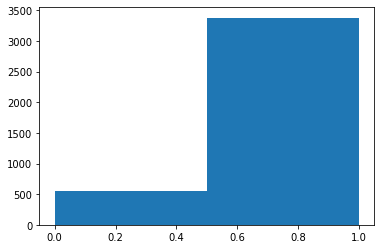

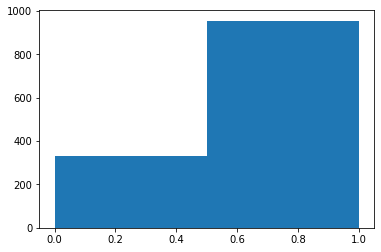

In [7]:
plt.hist(ArrestsWhite['released'], bins = 2)
plt.show()
plt.hist(ArrestsBlack['released'], bins = 2)
plt.show()

In [8]:
race_model = LinearRegression().fit(Arrests[["colour"]], Arrests["released"])
race_model.coef_

array([0.11659014])

In [9]:
check_model = LinearRegression().fit(Arrests[["colour"]], Arrests["checks"])

In [10]:
checkrelease_model = LinearRegression().fit(Arrests[["checks"]], Arrests["released"])

In [11]:
check_model.coef_

array([-0.61436111])

In [12]:
checkrelease_model.coef_

array([-0.06101365])

In [13]:
print(f'Mean # of Checks for Black Arrests {ArrestsBlack["checks"].mean()}')
print(f'Mean # of Checks for White Arrests {ArrestsWhite["checks"].mean()}')      

Mean # of Checks for Black Arrests 2.099378881987578
Mean # of Checks for White Arrests 1.485017775520569


In [28]:
whiteCount = ArrestsWhite.groupby(["year"]).count()
blackCount = ArrestsBlack.groupby(["year"]).count()

In [29]:
whiteCount

,released,colour,age,sex,employed,citizen,checks
year,,,,,,,
1997,369,369,369,369,369,369,369
1998,637,637,637,637,637,637,637
1999,849,849,849,849,849,849,849
2000,991,991,991,991,991,991,991
2001,900,900,900,900,900,900,900
2002,192,192,192,192,192,192,192


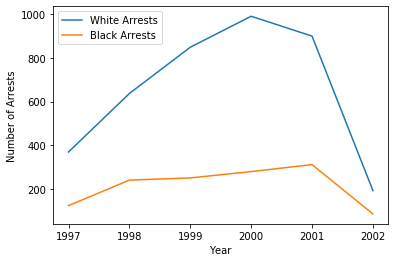

In [45]:
plt.plot(whiteCount.index, whiteCount["released"], label = "White Arrests")
plt.plot(blackCount.index, blackCount["released"], Label = "Black Arrests")
plt.xlabel("Year")
plt.ylabel("Number of Arrests")
plt.legend()
plt.show()

**Potential discrepancies in the data**:

The primary speed bump we noticed when looking through this data was that there seemed to be far fewer arrests in 2002. At first glance, this might suggest that in 2002 a legal change or something else in the environment changed criminal policies for marijuana possession; however, it may be more reasonable to assume that the data is simply incomplete. This could be a result of the data collectors stopping collection mid-2002. This is the most likely reason, as our background research revealed that the rest of the data collected by The Star started in 2003, suggesting there may have been a gap in collection between 2002 and 2003. This could potentially cause trouble if we were to conduct an analysis by year. However, since our questions is more focused on the trends between demographic factors and not progress over time, this gap in data probably won't impact us to much. 

Another flaw of this data is that it fails to have data on racial identites beyond White and Black. Although the demographic population of Toronto was not *super* diverse in the 2000s, White and Black people respectively represented roughly 50% and 8% of Toronto's population in the early 2000s. Toronto is also home to significant South Asian and Chinese groups as well. It's possible that arrests for people from these groups were excluded from the final dataset because of how few there were — historically, these groups have lower crime and arrest rates than White and Black populations, suggesting that there were so few marijuana-related arrests during this time period that the publishers chose to omit them.